In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings


In [3]:
dengue = pd.read_csv('dataset/dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue['Region'].value_counts()

Region
Region I       60
Region II      60
Region III     60
Region IV-A    60
Region IV-B    60
Region V       60
Region VI      60
Region VII     60
Region VIII    60
Region IX      60
Region X       60
Region XI      60
Region XII     60
Region XIII    60
NCR            60
CAR            60
BARMM          60
Name: count, dtype: int64

<h1>Yearly Trend of Dengue Cases and Death </h1>

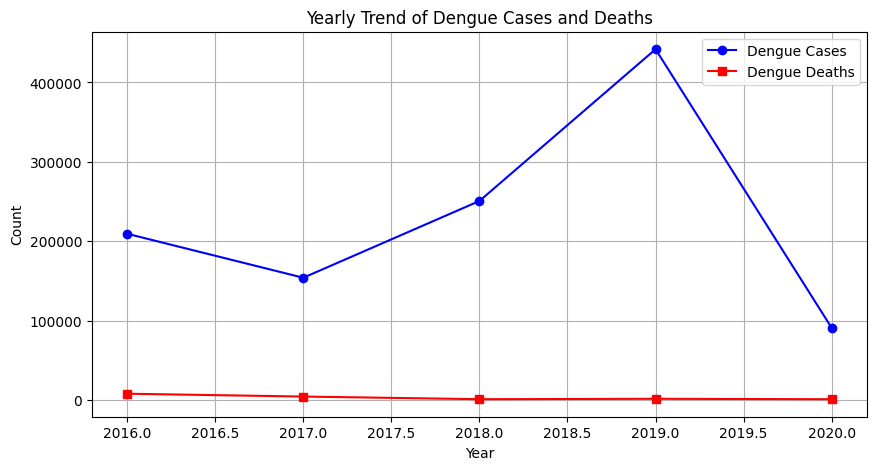

In [9]:
total_cases_per_year = dengue.groupby('Year')['Dengue_Cases'].sum()
total_deaths_per_year = dengue.groupby('Year')['Dengue_Deaths'].sum()

plt.figure(figsize=(10, 5))
plt.plot(total_cases_per_year.index, total_cases_per_year.values, marker='o', linestyle='-', color='b', label="Dengue Cases")
plt.plot(total_deaths_per_year.index, total_deaths_per_year.values, marker='s', linestyle='-', color='r', label="Dengue Deaths")
plt.title("Yearly Trend of Dengue Cases and Deaths")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


<h1>Average Dengue Cases per Month</h1>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13256\552271133.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_cases = dengue.groupby('Month')['Dengue_Cases'].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13256\552271133.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_cases.index, y=monthly_avg_cases.values, palette="Blues_r")


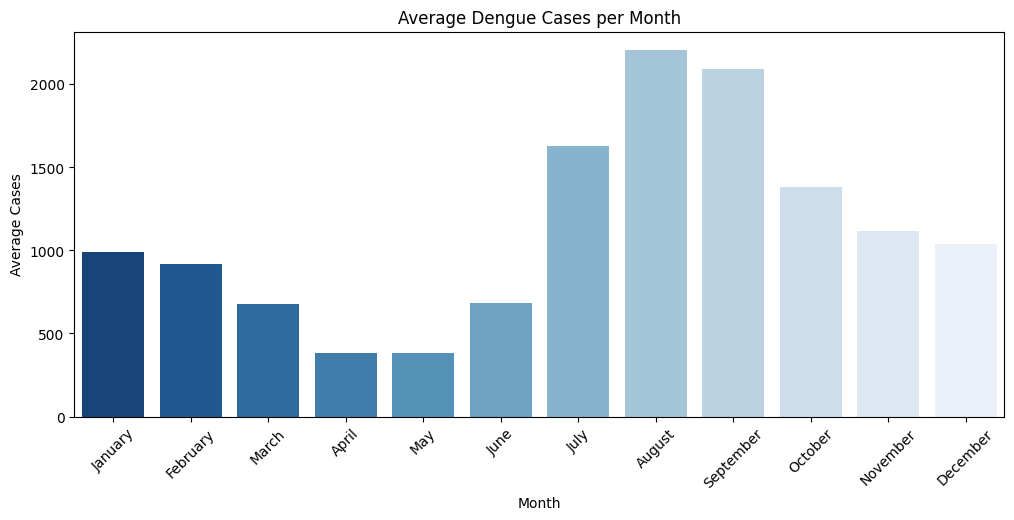

In [12]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_avg_cases = dengue.groupby('Month')['Dengue_Cases'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_avg_cases.index, y=monthly_avg_cases.values, palette="Blues_r")
plt.title("Average Dengue Cases per Month")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.xticks(rotation=45)
plt.show()


<h1>Case Fatality Rate (CFR) Over the Years</h1>

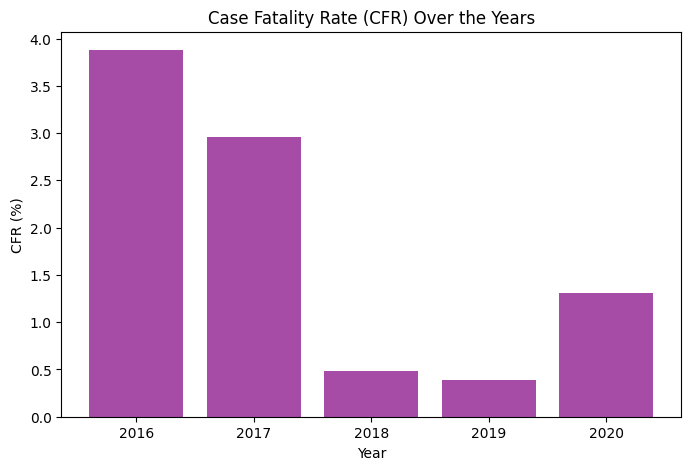

In [14]:
# Calculate Case Fatality Rate (CFR) per year
cfr_per_year = (total_deaths_per_year / total_cases_per_year) * 100

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(cfr_per_year.index, cfr_per_year.values, color='purple', alpha=0.7)
plt.title("Case Fatality Rate (CFR) Over the Years")
plt.xlabel("Year")
plt.ylabel("CFR (%)")
plt.show()


<h1>Average Dengue Deaths per Month</h1>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13256\3020621055.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13256\3020621055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_deaths.index, y=monthly_avg_deaths.values, palette="Reds_r")


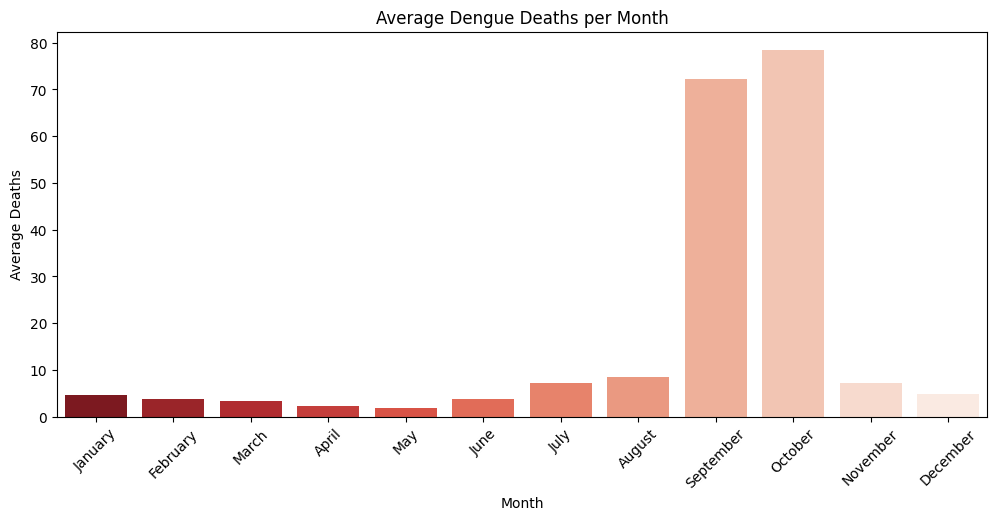

In [15]:
monthly_avg_deaths = dengue.groupby('Month')['Dengue_Deaths'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_avg_deaths.index, y=monthly_avg_deaths.values, palette="Reds_r")
plt.title("Average Dengue Deaths per Month")
plt.xlabel("Month")
plt.ylabel("Average Deaths")
plt.xticks(rotation=45)
plt.show()


<h1>Peak & Lowest Dengue Cases by Year</h1>

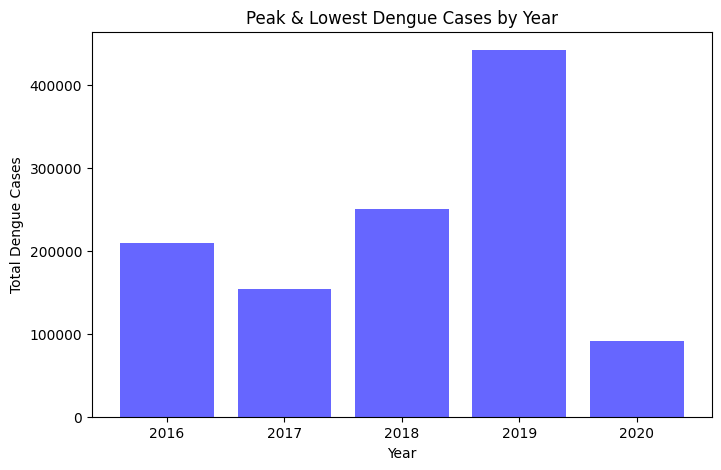

In [19]:
max_cases_year = total_cases_per_year.idxmax()
min_cases_year = total_cases_per_year.idxmin()

plt.figure(figsize=(8, 5))
plt.bar(total_cases_per_year.index, total_cases_per_year.values, color='blue', alpha=0.6)
plt.title("Peak & Lowest Dengue Cases by Year")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")

plt.show()


<h1>Peak & Lowest Dengue Deaths by Yea</h1>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13256\193219766.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


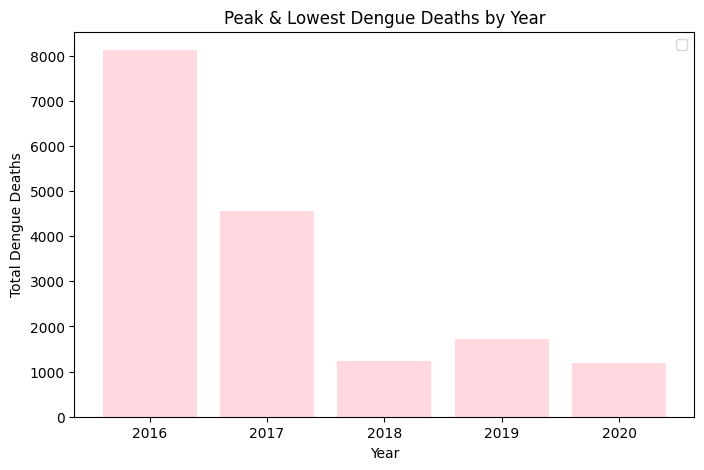

In [21]:
max_deaths_year = total_deaths_per_year.idxmax()
min_deaths_year = total_deaths_per_year.idxmin()

plt.figure(figsize=(8, 5))
plt.bar(total_deaths_per_year.index, total_deaths_per_year.values, color='pink', alpha=0.6)
plt.title("Peak & Lowest Dengue Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Total Dengue Deaths")
plt.legend()
plt.show()


<h1>Monthly Dengue Cases</h1>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13256\106400923.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = dengue.pivot_table(index="Year", columns="Month", values="Dengue_Cases", aggfunc="sum")


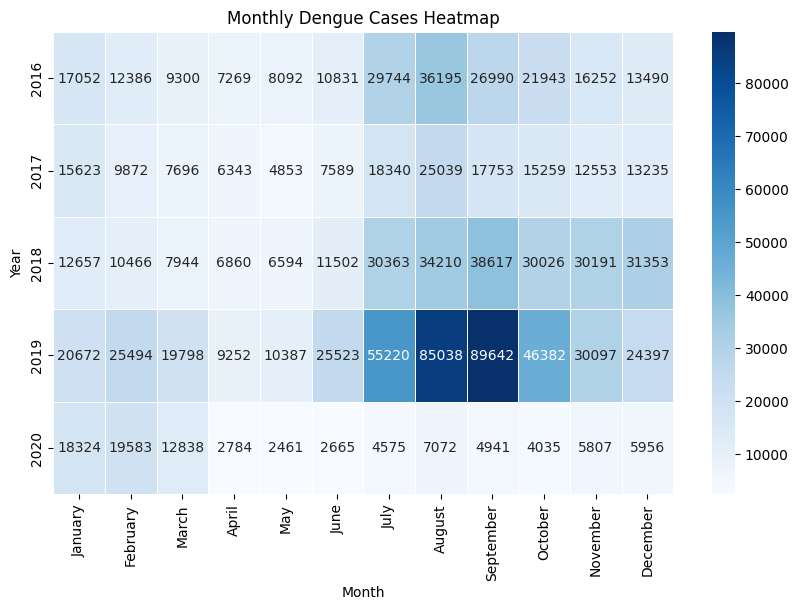

In [24]:
plt.figure(figsize=(10, 6))
df_pivot = dengue.pivot_table(index="Year", columns="Month", values="Dengue_Cases", aggfunc="sum")
sns.heatmap(df_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Dengue Cases Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


<h1>Monthly Dengue Deaths </h1>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13256\742350500.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = dengue.pivot_table(index="Year", columns="Month", values="Dengue_Deaths", aggfunc="sum")


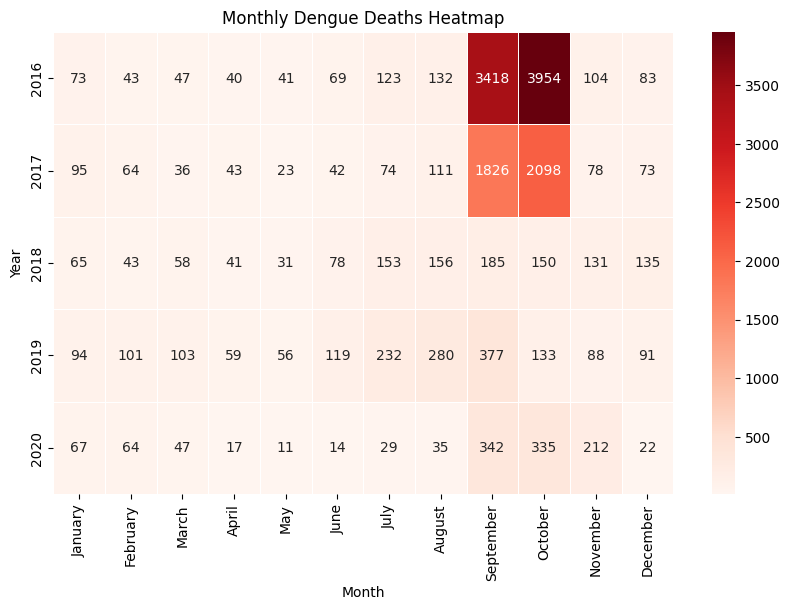

In [26]:
plt.figure(figsize=(10, 6))
df_pivot = dengue.pivot_table(index="Year", columns="Month", values="Dengue_Deaths", aggfunc="sum")
sns.heatmap(df_pivot, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Dengue Deaths Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


<h1>Correlation Between Dengue Cases & Deaths</h1>

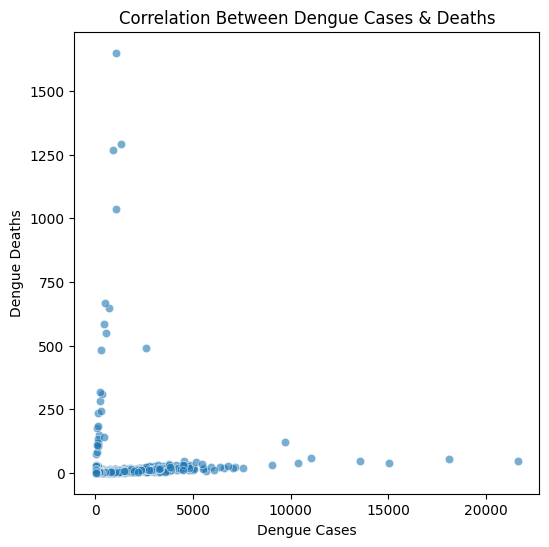

In [28]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=dengue['Dengue_Cases'], y=dengue['Dengue_Deaths'], alpha=0.6)
plt.title("Correlation Between Dengue Cases & Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()


<h1>Yearly Dengue Growth Rate</h1>

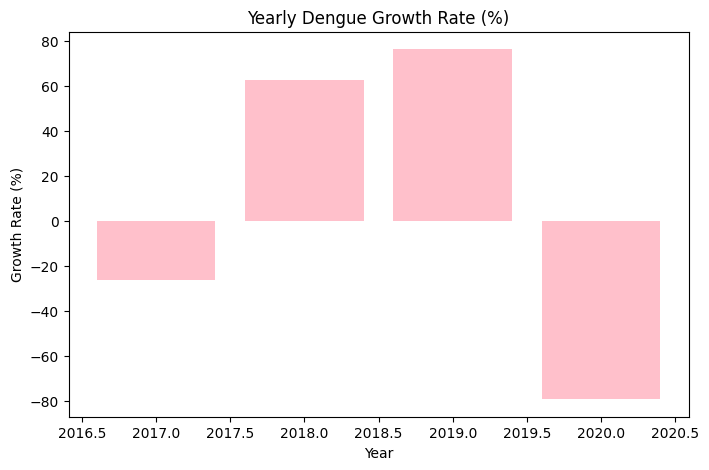

In [33]:
growth_rate = total_cases_per_year.pct_change() * 100

plt.figure(figsize=(8, 5))
plt.bar(growth_rate.index, growth_rate.values, color='pink')
plt.title("Yearly Dengue Growth Rate (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()


<h1>Dengue Mortality Rate Over Time (Deaths per 1000 Cases)</h1>

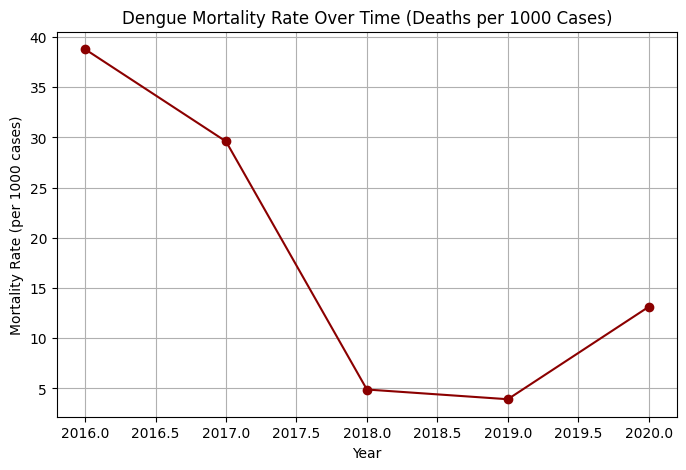

In [38]:
mortality_rate = (total_deaths_per_year / total_cases_per_year) * 1000

plt.figure(figsize=(8, 5))
plt.plot(mortality_rate.index, mortality_rate.values, marker='o', linestyle='-', color='darkred')
plt.title("Dengue Mortality Rate Over Time (Deaths per 1000 Cases)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate (per 1000 cases)")
plt.grid()
plt.show()


<h1>Comparing Peak Year {peak_year} to Previous Year</h1>

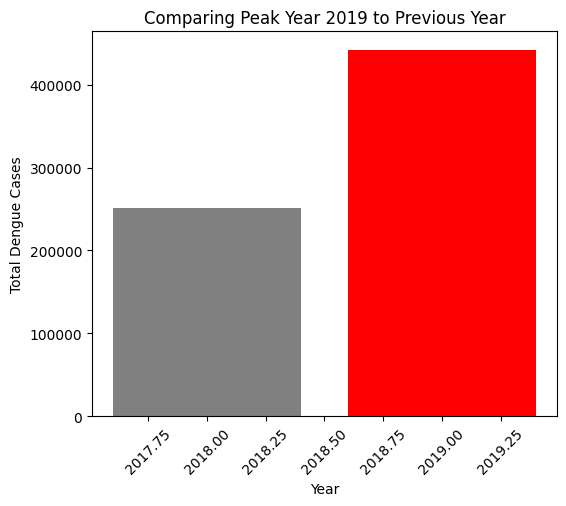

In [40]:
peak_year = total_cases_per_year.idxmax()
previous_year = peak_year - 1

cases_peak = total_cases_per_year[peak_year]
cases_prev = total_cases_per_year.get(previous_year, 0) 

plt.figure(figsize=(6, 5))
plt.bar([previous_year, peak_year], [cases_prev, cases_peak], color=['gray', 'red'])
plt.title(f"Comparing Peak Year {peak_year} to Previous Year")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Total Dengue Cases")
plt.show()


<h1>Total dengue cases recorded</h1>

In [43]:
total_cases = dengue['Dengue_Cases'].sum()
print(f"Total Dengue Cases Recorded: {total_cases}")


Total Dengue Cases Recorded: 1147425


<h1>Total Dengue Deaths</h1>

In [45]:
total_deaths = dengue['Dengue_Deaths'].sum()
print(f"Total Dengue Deaths Recorded: {total_deaths}")


Total Dengue Deaths Recorded: 16844


<h1>Worst Month of Dengue</h1>

In [48]:
worst_month = dengue.loc[dengue['Dengue_Cases'].idxmax()]
print(f"Worst Month: {worst_month['Month']} {worst_month['Year']} with {worst_month['Dengue_Cases']} cases")


Worst Month: September 2019 with 21658 cases


<h1>Most Dangerous year of Dengue</h1>

In [49]:
most_dangerous_year = cfr_per_year.idxmax()
print(f"Most Dangerous Year: {most_dangerous_year} with CFR of {cfr_per_year[most_dangerous_year]:.2f}%")


Most Dangerous Year: 2016 with CFR of 3.88%


<h1>Deadliest Month</h1>

In [52]:
deadliest_month = dengue.loc[dengue['Dengue_Deaths'].idxmax()]
print(f"Deadliest Month: {deadliest_month['Month']} {deadliest_month['Year']} with {deadliest_month['Dengue_Deaths']} deaths")


Deadliest Month: October 2016 with 1651 deaths


<h1>Dengue Outbreaks Over the Decades</h1>

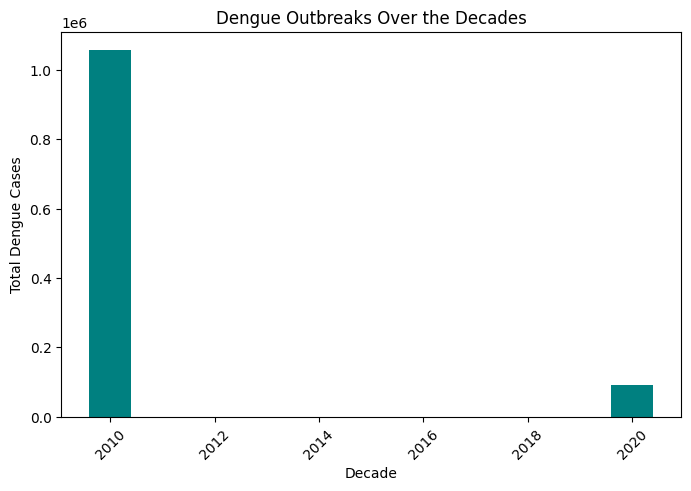

In [55]:
dengue['Decade'] = (dengue['Year'] // 10) * 10  

cases_per_decade = dengue.groupby('Decade')['Dengue_Cases'].sum()

plt.figure(figsize=(8, 5))
plt.bar(cases_per_decade.index, cases_per_decade.values, color='teal')
plt.title("Dengue Outbreaks Over the Decades")
plt.xlabel("Decade")
plt.ylabel("Total Dengue Cases")
plt.xticks(rotation=45)
plt.show()


<h1>Best year that prevent Dengue cases</h1>

In [57]:
smallest_increase_year = growth_rate.idxmin()
print(f"Year with Best Prevention: {smallest_increase_year} with growth rate of {growth_rate[smallest_increase_year]:.2f}%")


Year with Best Prevention: 2020 with growth rate of -79.40%


<h1>Comparing Dengue Cases for Each Month Across Years</h1>

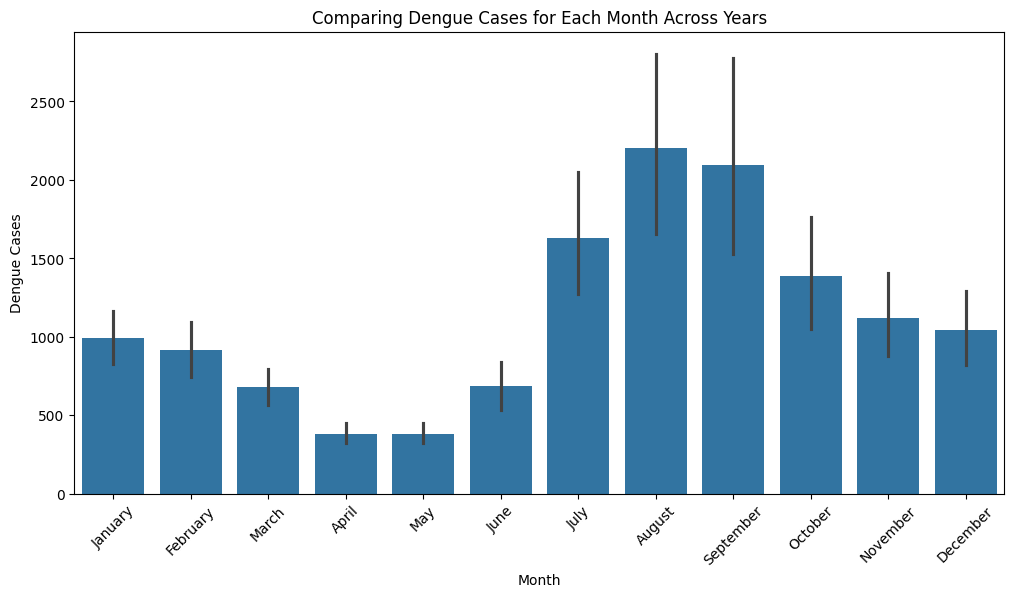

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=dengue["Month"], y=dengue["Dengue_Cases"])
plt.title("Comparing Dengue Cases for Each Month Across Years")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)

plt.show()